>>> CARREGANDO DADOS...
Dataset carregado com 244 linhas e 7 colunas.


/tmp/ipython-input-3151996014.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['time'] = df['time'].replace({'Lunch': 'Almoço', 'Dinner': 'Jantar'})
/tmp/ipython-input-3151996014.py:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['sex'] = df['sex'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
/tmp/ipython-input-3151996014.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories,

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Feminino,Não,Dom,Jantar,2
1,10.34,1.66,Masculino,Não,Dom,Jantar,3
2,21.01,3.50,Masculino,Não,Dom,Jantar,3
3,23.68,3.31,Masculino,Não,Dom,Jantar,2
4,24.59,3.61,Feminino,Não,Dom,Jantar,4



>>> INICIANDO ETL...
Sucesso: Não há valores nulos no dataset.
Dados transformados (Prontos para IA):


,total_bill,tip,size,sex_Feminino,smoker_Não,day_Sex,day_Sab,day_Dom,time_Jantar
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True



>>> GERANDO VISUALIZAÇÕES...


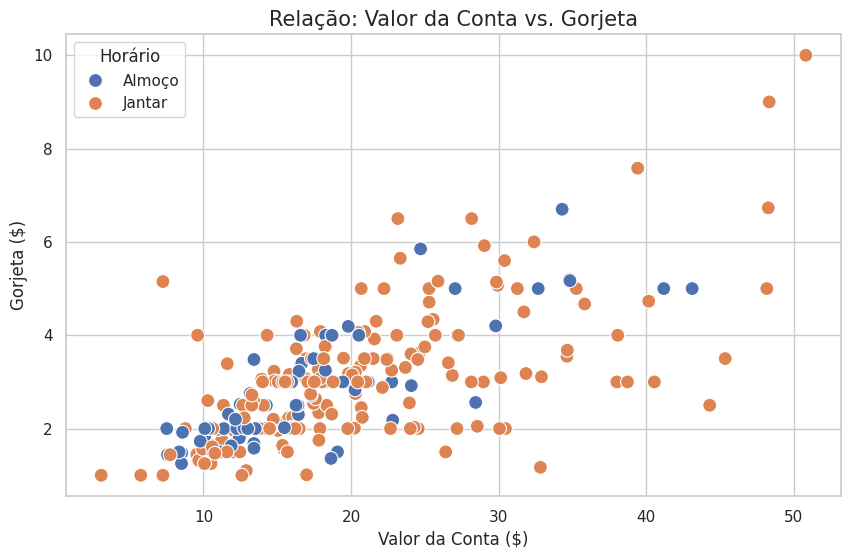

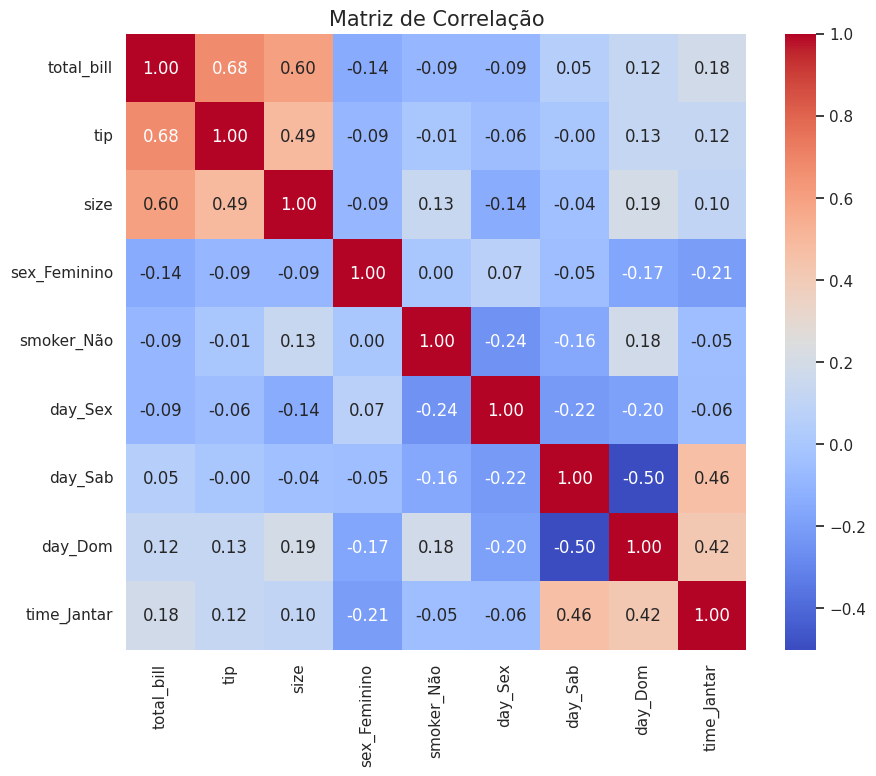


>>> TREINANDO O MODELO...
Modelo treinado com sucesso!

>>> AVALIANDO PERFORMANCE...
R² (Precisão Explicativa): 0.44
RMSE (Erro Médio): $0.84


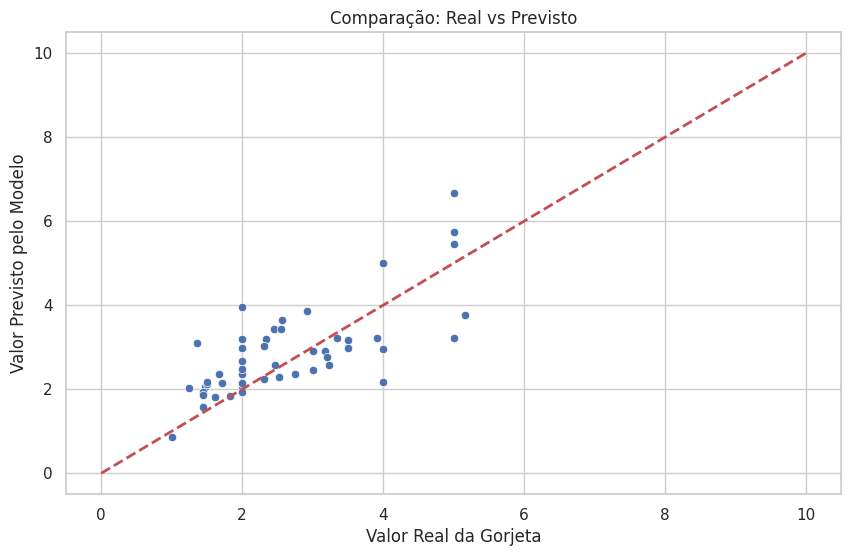


>>> CONCLUSÃO:
O modelo de Regressão Linear foi capaz de explicar 43.7% da variação das gorjetas.
A variável 'total_bill' demonstrou ser o maior preditor do valor da gorjeta.


In [4]:
# --- IMPORTS E CONFIGURAÇÃO ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")

# ==============================================================================
# 1. DESCRIÇÃO E CARREGAMENTO (ETL - Extração)
# ==============================================================================
print(">>> CARREGANDO DADOS...")
# Dataset 'tips' (Gorjetas) já vem embutido na biblioteca Seaborn
df = sns.load_dataset('tips')

# --- ALTERAÇÃO AQUI: TRADUZINDO PARA PT-BR ---
# Traduzindo a coluna 'time' (Horário)
df['time'] = df['time'].replace({'Lunch': 'Almoço', 'Dinner': 'Jantar'})

# (Opcional) Traduzindo também os dias e sexo para ficar tudo bonito
df['sex'] = df['sex'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
df['day'] = df['day'].replace({'Thur': 'Qui', 'Fri': 'Sex', 'Sat': 'Sab', 'Sun': 'Dom'})
df['smoker'] = df['smoker'].replace({'Yes': 'Sim', 'No': 'Não'})
# ---------------------------------------------

# Mostrando as primeiras linhas para validação
print(f"Dataset carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.")
display(df.head())

# ==============================================================================
# 2. PROCESSO DE ETL (Limpeza e Transformação)
# ==============================================================================
print("\n>>> INICIANDO ETL...")

# Verificando dados nulos
if df.isnull().sum().sum() == 0:
    print("Sucesso: Não há valores nulos no dataset.")
else:
    print("Aviso: Existem valores nulos (tratamento necessário).")

# Transformação (Encoding): Converter texto em números para o algoritmo ler
# O drop_first=True vai remover uma das colunas para evitar redundância
df_pronto = pd.get_dummies(df, drop_first=True)

print("Dados transformados (Prontos para IA):")
display(df_pronto.head())

# ==============================================================================
# 3. ANÁLISE EXPLORATÓRIA (Visualizações)
# ==============================================================================
print("\n>>> GERANDO VISUALIZAÇÕES...")

# Gráfico 1: Dispersão
plt.figure(figsize=(10, 6))
# O hue='time' agora vai usar os nomes em português (Almoço/Jantar)
sns.scatterplot(x='total_bill', y='tip', data=df, hue='time', s=100)
plt.title('Relação: Valor da Conta vs. Gorjeta', fontsize=15)
plt.xlabel('Valor da Conta ($)')
plt.ylabel('Gorjeta ($)')
plt.legend(title='Horário')
plt.show()

# Gráfico 2: Mapa de Calor (Correlação)
plt.figure(figsize=(10, 8))
correlation = df_pronto.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=15)
plt.show()

# ==============================================================================
# 4. MODELAGEM (Machine Learning)
# ==============================================================================
print("\n>>> TREINANDO O MODELO...")

# Definindo Variáveis:
X = df_pronto.drop('tip', axis=1)
y = df_pronto['tip']

# Divisão: 80% Treino, 20% Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmo: Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# ==============================================================================
# 5. AVALIAÇÃO E RESULTADOS
# ==============================================================================
print("\n>>> AVALIANDO PERFORMANCE...")

previsoes = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, previsoes)
rmse = np.sqrt(mean_squared_error(y_test, previsoes))

print(f"R² (Precisão Explicativa): {r2:.2f}")
print(f"RMSE (Erro Médio): ${rmse:.2f}")

# Visualizando Real vs Previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=previsoes)
plt.plot([0, 10], [0, 10], '--r', linewidth=2)
plt.xlabel('Valor Real da Gorjeta')
plt.ylabel('Valor Previsto pelo Modelo')
plt.title('Comparação: Real vs Previsto')
plt.show()

# ==============================================================================
# 6. CONCLUSÃO TÉCNICA
# ==============================================================================
print("\n>>> CONCLUSÃO:")
print(f"O modelo de Regressão Linear foi capaz de explicar {r2*100:.1f}% da variação das gorjetas.")
print("A variável 'total_bill' demonstrou ser o maior preditor do valor da gorjeta.")